In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from scipy.stats import norm, kurtosis
import pandas as pd


In [15]:
fig_size_dim    = 12
golden_ratio    = (1+np.sqrt(5))/2
fig_size        = (fig_size_dim, fig_size_dim/golden_ratio)

def plot_style():
    font_size       = 12
    dpi             =  600

    params = {'figure.figsize': fig_size,
              'figure.dpi': dpi,
              'savefig.dpi': dpi,
              'font.size': font_size,
              'font.family': "Tahoma",
              'figure.titlesize': font_size,
              'legend.fontsize': font_size,
              'axes.labelsize': font_size,
              'axes.titlesize': font_size,
              'xtick.labelsize': font_size,
              'ytick.labelsize': font_size,
                }

    plt.rcParams.update(params)
plot_style()


In [16]:
NN = [50]
N = 6
#Depth = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,21]]
Depth = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13,21]]
OTOC = []
OTOC2 = []
OTOC50q_t = []
E_OTOC50q = []
df = pd.read_csv(f'OTOC_Mana_6/OTOC(2)_sc_N6_d3_rand_Rot_Z_5_zero.csv')

# OTOC.append(np.std(df["0"]))

OTOC50q = []
for j in range(10):

    OTOC50q.append(np.std(df["0"][j*50:50*(j+1)]))
OTOC50q_t.append(np.mean(np.array(OTOC50q)))
E_OTOC50q.append(np.std(np.array(OTOC50q))/np.sqrt(10))

OTOC2.append(np.std(df["0"][:50]))

i = 0
M_er = [0]
M = [0]
for NN in NN:
    
    depth = Depth[i]
    i +=1
    
    for dd in depth:
        df1 = pd.read_csv(f'OTOC_Mana_6/OTOC({dd})_sc_N{N}_d3_rand_Rot_Z_{NN}.csv')
        OTOC.append(np.std(df1["0"]))
        OTOC50q = []
        for j in range(10):

            OTOC50q.append(np.std(df1["0"][j*50:50*(j+1)]))
        OTOC50q_t.append(np.mean(np.array(OTOC50q)))
        E_OTOC50q.append(np.std(np.array(OTOC50q))/np.sqrt(10))

        OTOC2.append(np.std(df1["0"][:50]))

        rep = 0
        mana = []
        while rep<10:
            df2 = pd.read_csv(f'OTOC_Mana_6/Mana({dd})_sc_N{N}_d3_rand_Rot_Z_{NN}_rep_{rep}.csv')
            mana.append(df2["0"])
            rep +=1
       
        Mana = np.mean(np.array(mana))
        mana_er = np.std(6*np.array(mana)/np.sqrt(10))
    
        M.append(Mana)
        M_er.append(mana_er)

# MANA_50 = 6*np.array(M)/(0.5*6*np.log(3)-0.5*np.log(np.pi/2))
MANA_50 = 6*np.array(M)
OTOC_50 = 1-np.array(OTOC)
OTOC2_50 = 1-np.array(OTOC2)
y50q=1-np.array(OTOC50q_t)

In [17]:

x = MANA_50
y = OTOC2_50
y1 = OTOC_50
E1 = [1/np.sqrt(50) for i in range(len(MANA_50))]
E2 = [1/np.sqrt(500) for i in range(len(MANA_50))]

a, b = np.polyfit(x,y50q, 1)
#c, d = np.polyfit(x, y1, 1)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


a= 0.2208586768101846 b= 0.2636120697168376


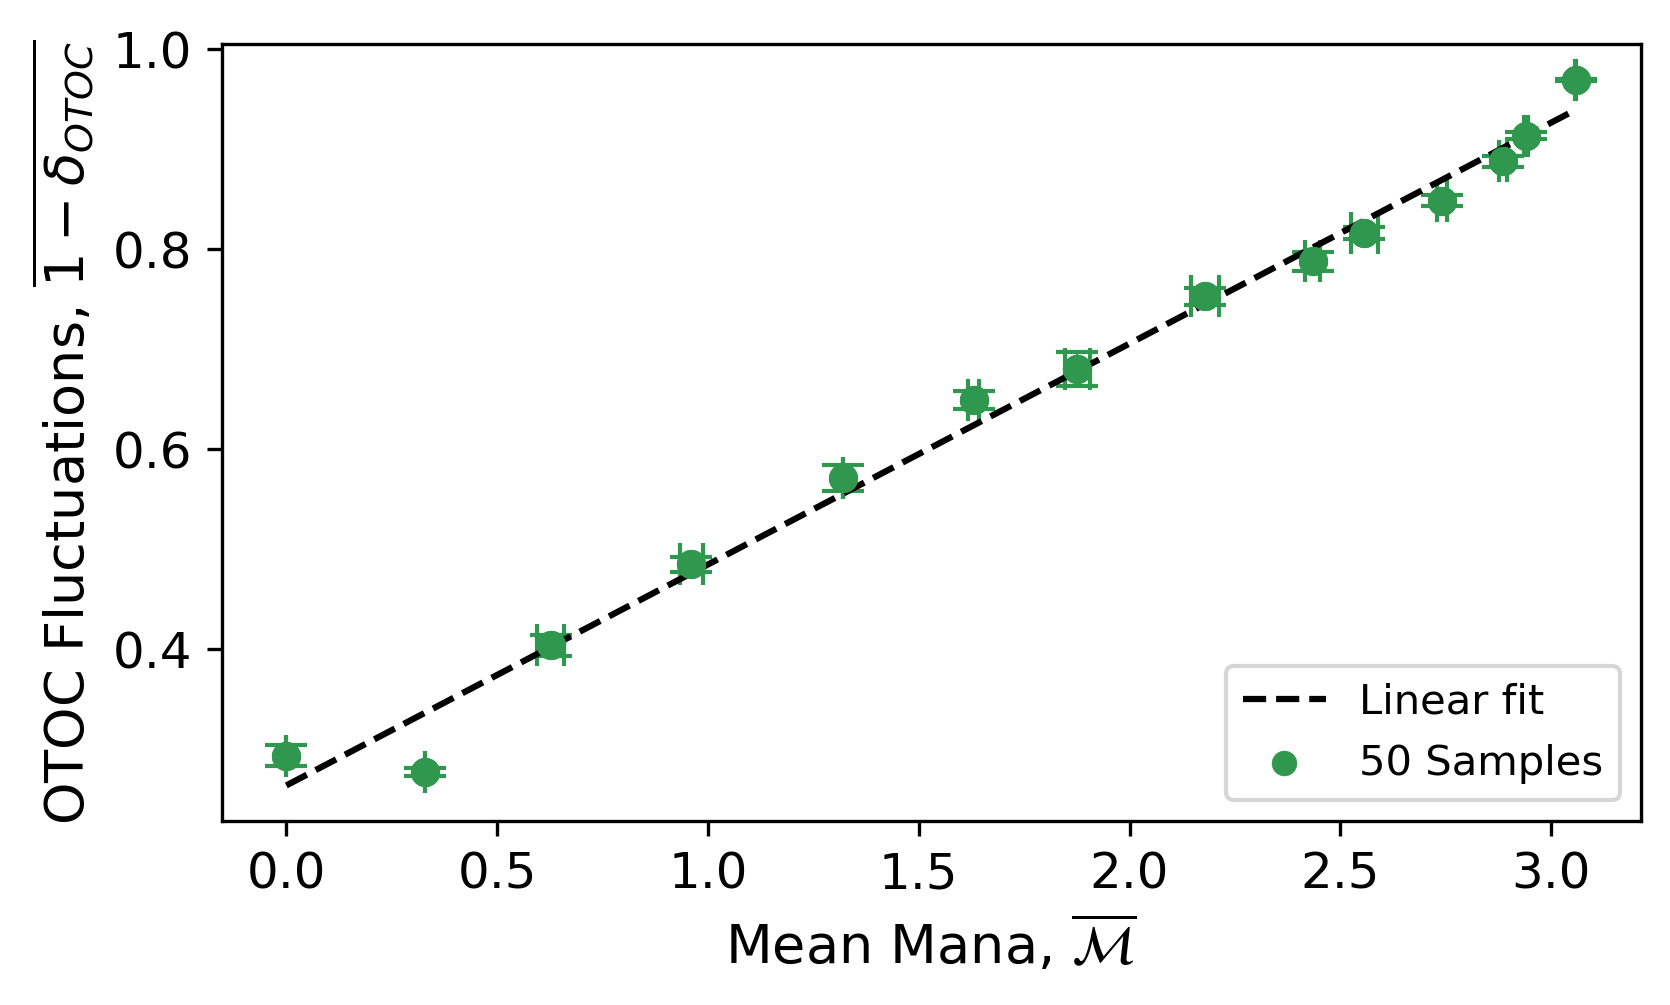

In [18]:
fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)

fig.set_size_inches(5.5, 3.5)
font = {'size' : 30}
mpl.rc('font', **font)
images = []
fig.subplots_adjust(bottom = 0.2, top=0.94, left=0.13, right=0.99)

axes.scatter(MANA_50,y50q,lw=0.1,c=plt.cm.Greens(0.7),label=f"50 Samples")

# axes.scatter(MANA_50,OTOC_50,lw=0.1,c=plt.cm.Oranges(0.7),label=f"500 Samples")

axes.errorbar(MANA_50,y50q,yerr=E_OTOC50q, lw=0.5,c=plt.cm.Greens(0.7),capsize=5,fmt="o")
axes.errorbar(MANA_50,y50q,xerr=M_er, lw=0.5,c=plt.cm.Greens(0.7),capsize=5,fmt="o")
#axes.errorbar(MANA_50,OTOC_50,yerr=OTOC_E, lw=0.5,c=plt.cm.Oranges(0.7),fmt="o")
#axes.errorbar(MANA_50,OTOC_50,xerr=M_er, lw=0.5,c=plt.cm.Oranges(0.7),fmt="o")

axes.plot(x,a*x+b,"--", lw=1.5,color = "black", label = "Linear fit")
axes.set_ylabel(r"OTOC Fluctuations, $\overline{1-\delta_{OTOC}}$", fontsize = 13)
axes.set_xlabel(r"Mean Mana, $\overline{\mathcal{M}}$", fontsize = 13)
# axes.set_yticks([0,0.25,0.5,0.75,1])
# axes.set_yticklabels(["0","","0.5","", "1"],fontsize=11)
# axes.set_xticks([0,0.25,0.5,0.75,1])
# axes.set_xticklabels(["0","","0.5","", "1"],fontsize=11)
print("a=",a,"b=",b)
plt.legend(loc='lower right',fontsize=10)
plt.savefig(f"plots/ManavsOTOC.pdf", bbox_inches = "tight")

In [19]:
M2 = []
depth = [i for i in range(3,23,2)]+[24,26]
OTOC = []
E_OTOC = []
E_OTOC50 = []
df1 = pd.read_csv(f'qubit_data_final/OTOC(1)_sc_N12_d3_rand_Rot_Z_zero.csv')
OTOC.append(np.std(df1["0"]))
OTOC50_t = []
OTOC50 = []
for j in range(10):

    OTOC50.append(np.std(df1["0"][j*50:50*(j+1)]))
OTOC50_t.append(np.mean(np.array(OTOC50)))
E_OTOC50.append(np.std(np.array(OTOC50))/np.sqrt(10))
#OTOC50.append(np.std(df1["0"][:50]))
e_OTOC = np.array(df1["0"])
# E_OTOC.append(kurtosis(e_OTOC))
# E_OTOC50.append( kurtosis(e_OTOC[:50]))
rep = 0
m = []
ME2 = []
while rep<10:
    df2 = pd.read_csv(f'qubit_data_final/Magic(1)_sc_N12_d3_rand_Rot_Z_rep_{rep}_zero.csv')
    m.append(df2["0"])

    rep +=1

M = np.mean(np.array(m))
ME2.append(np.std(np.array(m)))

M2.append(M)

N = 12

#depth = [i for i in range(1,20)]
for NN in [50]:
    
    
    
   
    for dd in depth:
        df1 = pd.read_csv(f'qubit_data_final/OTOC({dd})_sc_N{N}_d3_rand_Rot_Z.csv')
        OTOC.append(np.std(df1["0"]))
        e_OTOC = np.array(df1["0"])
        # E_OTOC.append(kurtosis(e_OTOC))
        # E_OTOC50.append( kurtosis(e_OTOC[:50]))
        OTOC50 = []
        for j in range(10):
            
            OTOC50.append(np.std(df1["0"][j*50:50*(j+1)]))
            # print(OTOC50)
        OTOC50_t.append(np.mean(np.array(OTOC50)))
        E_OTOC50.append(np.std(np.array(OTOC50))/np.sqrt(10))
        rep = 0
        m = []
        
        while rep<10:
            df2 = pd.read_csv(f'qubit_data_final/Magic({dd})_sc_N{N}_d3_rand_Rot_Z_rep_{rep}.csv')
            m.append(df2["0"])
            
            rep +=1
       
        M = np.mean(np.array(m))
        ME2.append(np.std(np.array(m))*12/np.sqrt(10))
    
        M2.append(M)
y50 = -np.log2(np.array(OTOC50_t))
y500 = -np.log2(np.array(OTOC))
E50 = [1/np.sqrt(50) for i in range(len(y50))]
E500 = [1/np.sqrt(500) for i in range(len(y500))]
x = np.array(M2)*12
# print(len(E_OTOC50))
a, b = np.polyfit(x, y50, 1)
# print(a,b)
# print("E", E_OTOC50)

In [20]:
fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)

fig.set_size_inches(5.5, 3.5)
font = {'size' : 30}
mpl.rc('font', **font)
images = []
fig.subplots_adjust(bottom = 0.2, top=0.94, left=0.13, right=0.99)


axes.errorbar(x,y50,yerr=E_OTOC50, lw=0.2,c=plt.cm.Blues(0.7),capsize=5,fmt="o")
axes.errorbar(x,y50,xerr=ME2, lw=0.5,c=plt.cm.Blues(0.7),capsize=5,fmt="o")
axes.scatter(x,y50,lw=0.1,c=plt.cm.Blues(0.7),label=f"50 Samples")
#axes.errorbar(x,y500,E_OTOC, lw=0.5,c=plt.cm.Reds(0.7),fmt="o")
#axes.errorbar(x,y500,xerr=ME2, lw=0.5,c=plt.cm.Reds(0.7),fmt="o")
#axes.scatter(x,y500,lw=0.1,c=plt.cm.Reds(0.7),label=f"500 Samples")
axes.plot(x,a*x+b,"--", lw=1.5,color = "black", label = "Linear fit")
axes.set_ylabel(r" $-Log_2(\overline{\delta_{OTOC}})$", fontsize = 13)
axes.set_xlabel(r"Mean Stabilizer Renyi Entropy, $\overline{M_2}$", fontsize = 13)
# axes.set_yticks([0,0.25,0.5,0.75,1])
# axes.set_yticklabels(["0","","0.5","", "1"],fontsize=11)
# axes.set_xticks([0,0.25,0.5,0.75,1])
# axes.set_xticklabels(["0","","0.5","", "1"],fontsize=11)
# #plt.grid()
plt.legend(loc='lower right',fontsize=10)
plt.savefig(f"plots/SREvsOTOC.pdf", bbox_inches = "tight")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [24]:
time= [t/20 for t in range(60)]
N = 5
OTOC_t = []

M_t = []
M_E = []
for t in time:

    me = np.zeros(3)
    for rep in range(3):
        
        
        df_m_t = pd.read_csv(f'qubit_data_final_time_evo/Magic_sc_N{N}_qubit_time_evo_{int(t*20)}_rep_{rep}_double_cliff_Chio_500_test_run.csv')
        #print(np.array(df_m_t["0"]))
        me[rep] = np.array(df_m_t["0"])
        

    M_t.append(np.mean(me))
OTOC50_t_time = []
E_OTOC50 = []
for t in time:
    df_O = pd.read_csv(f'qubit_data_final_time_evo/OTOC_sc_N{N}_qubit_time_evo_{int(t*20)}_double_cliff_Choi_500.csv')
    OTOC_t.append(np.std(df_O["0"]))
    
    OTOC50=[]
    for j in range(10):
        
        OTOC50.append(np.std(df_O["0"][j*50:50*(j+1)]))
        #print(OTOC50)
    OTOC50_t_time.append(np.mean(np.array(OTOC50)))
    E_OTOC50.append(np.std(np.array(OTOC50))/np.sqrt(10))
    
OTOC_time = -np.log2(np.array(OTOC50_t_time))
print(len(OTOC_time))

60


In [25]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a *(x) + b
popt, pcov = curve_fit(func, OTOC_time, np.array(M_t))
print(popt)

[4.14038769 0.2456736 ]


In [26]:

fig, axes = plt.subplots(ncols=1, nrows=1, dpi=300)

fig.set_size_inches(5.5,3)
font = {'size' : 30}
mpl.rc('font', **font)
images = []
fig.subplots_adjust(bottom = 0.2, top=0.94, left=0.13, right=0.99)

#Et50 = [1/np.sqrt(50) for i in range(len(time))]
#axes.errorbar(time,OTOC_time,Et50, lw=0.5,c=plt.cm.Blues(0.7),fmt="o")
axes.plot(time, np.array(M_t),"--", lw=1.5,color = "Black", label =r"$M_2$ ")

axes.scatter(time[::2],4.14*np.array(OTOC_time[::2])+0.24,lw=0.1,c=plt.cm.Reds(0.7),label=r"$-4.14Log_2 \delta_{OTOC}+0.24$")
axes.errorbar(time[::2],4.14*np.array(OTOC_time[::2])+0.24,E_OTOC50[::2], lw=0.5,c=plt.cm.Reds(0.7),capsize=5,fmt="o")

#axes.plot(x,a*x+b,"--", lw=1.5,color = "black", label = "Linear fit")
axes.set_xlabel(r"Time, $t$", fontsize = 13)
axes.set_ylabel(r" Magic", fontsize = 13)
# axes.set_yticks([0,0.25,0.5])
# axes.set_yticklabels(["0","0.25","0.5"],fontsize=11)
# axes.set_xticks([0,1,2,3])
# axes.set_xticklabels(["0","1", "2", "3"],fontsize=11)
#plt.grid()
plt.legend(loc='lower right',fontsize=10)
plt.savefig(f"plots/time_evo_10.pdf", bbox_inches = "tight")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
